In [14]:
import numpy as np

def reshapeAndAppend1s(faces):
    faces = faces[:, :, ::-1]
    faces = faces.T
    faces = np.reshape(faces, (faces.shape[0] ** 2, faces.shape[2]))
    faces = np.vstack((faces, np.ones(faces.shape[1])))
    return faces

def fMSE (w, Xtilde, y):
    yhat = Xtilde.T.dot(w) 
    fmse = ((yhat-y)**2).mean() / 2
    return fmse

def gradfMSE (w, Xtilde, y, alpha = 0.):
    return (Xtilde * (Xtilde.T.dot(w) - y)).mean() + (w[:-1].T.dot(w[:-1])).mean() * (alpha/2)

def grad_descent(alpha = 0.):
    lr = 3e-3  # Step size aka learning rate
    epochs = 5000  # Number of gradient descent iterations

    w = 0.01 * np.random.randn(xtr.shape[0])

    for i in range(epochs):
        if i % 500 == 0: print(f'epoch {i}')
        w = w - (lr * gradfMSE(w, xtr, ytr))
        
    return w

xtr = reshapeAndAppend1s(np.load("age_regression_Xtr.npy"))
ytr = np.load("age_regression_ytr.npy")
xte = reshapeAndAppend1s(np.load("age_regression_Xte.npy"))
yte = np.load("age_regression_yte.npy")

In [15]:
w1 = np.linalg.solve(xtr.dot(xtr.T), xtr.dot(ytr))

In [16]:
w3 = grad_descent()

epoch 0
epoch 500
epoch 1000
epoch 1500
epoch 2000
epoch 2500
epoch 3000
epoch 3500
epoch 4000
epoch 4500


In [19]:
w2 = grad_descent(0.1)

epoch 0
epoch 500
epoch 1000
epoch 1500
epoch 2000
epoch 2500
epoch 3000
epoch 3500
epoch 4000
epoch 4500


In [20]:
print(fMSE(w1, xtr, ytr))
print(fMSE(w1, xte, yte))

print(fMSE(w2, xtr, ytr))
print(fMSE(w2, xte, yte))

print(fMSE(w3, xtr, ytr))
print(fMSE(w3, xte, yte))

39.242962989290696
206.7964748541472
138.2149826100737
142.04473386320925
138.30476559363106
142.12318633548514


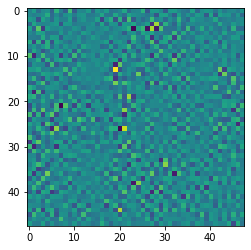

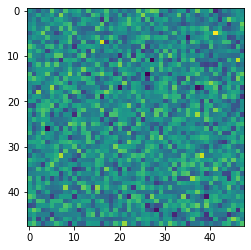

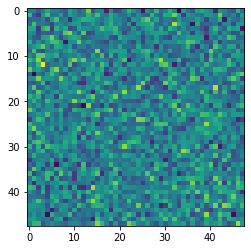

In [21]:
from matplotlib import pyplot as plt

for i in [w1, w2, w3]:
    t = i[:2304].reshape((48,48))
    plt.imshow(t)
    plt.show()

In [41]:
# report rmse for part c
yhat = xte.T.dot(w3)
print(yhat)
rmse = (((yhat-yte)**2).mean()) ** 0.5
print(rmse)

errors = abs(yte - yhat)
errors_idx = np.argsort(errors)
errors_idx = errors_idx[::-1]
errors_idx = errors_idx[0:5]
print(errors_idx)
print(temp.reshape(48,48))

for i in errors_idx:
    print(i)
    image = xte[:, i]
    plt.imshow(image)
    plt.show()




[26.92715321 35.14735517 38.70231025 ... 44.10332824 33.27579604
 40.90963471]
16.85960772589239
[ 830 1120 2451  389 2439]


ValueError: cannot reshape array of size 1 into shape (48,48)